# Prédiction de l’inflation de l’année suivante

L’inflation correspond à l’augmentation durable du niveau général des prix, généralement mesurée par l’indice des prix à la consommation (CPI). Elle reflète une perte de pouvoir d’achat et constitue un indicateur clé de la stabilité macroéconomique. Une inflation faible et stable favorise la visibilité et la planification économique, tandis qu’une inflation élevée ou volatile complique les décisions des ménages, des entreprises et des pouvoirs publics.

Au-delà du constat a posteriori, l’enjeu principal réside dans la **capacité à anticiper l’inflation future**. En s’appuyant sur les indicateurs observés à l’année *t* (inflation courante, croissance, chômage, dette, etc.), il devient possible d’anticiper la situation de l’inflation à l’année *t+1*. Un modèle orienté vers cette prévision transforme l’information macroéconomique actuelle en un signal prospectif, permettant d’identifier à l’avance les situations à risque, comme l’entrée dans un régime d’inflation élevée.

L’objectif de ce travail est de construire un modèle de classification capable de prédire
si l’inflation de l’année suivante dépassera un seuil critique de 5 %.

Le problème est formulé comme une tâche de **classification binaire supervisée** :
- 0 : inflation future ≤ 5 %
- 1 : inflation future > 5 %

Les variables explicatives correspondent aux indicateurs macroéconomiques observés
à l’année *t*, tandis que la cible est définie à l’année *t+1*.
Cette approche permet d’anticiper les périodes de tension inflationniste à partir
d’informations disponibles au présent.

Le but n’est pas d’expliquer en détail les causes structurelles de l’inflation, mais de fournir un indicateur synthétique et opérationnel permettant d’anticiper les périodes de tension inflationniste et de soutenir la prise de décision en matière de politique économique et de gestion des risques macroéconomiques.


## Donnees

Le jeu de données utilisé provient de Kaggle :  
**Global Economic Indicators (2010–2025)**.

Il s’agit d’un jeu de données en **structure panel** (pays–année) contenant :
- des indicateurs d’inflation,
- des variables de croissance économique,
- des indicateurs de marché du travail,
- des variables budgétaires et financières.

Cette structure permet d’exploiter à la fois la dimension temporelle
et la dimension transversale (entre pays).


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tanishksharma9905/global-economic-indicators-20102025")

print("Path to dataset files:", path)

100%|██████████| 257k/257k [00:00<00:00, 28.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/tanishksharma9905/global-economic-indicators-20102025/versions/1


In [ ]:
import os

os.listdir(path)


['world_bank_data_2025.csv']

## Exploration des donnees

### Aperçu des données

In [ ]:
import pandas as pd

df = pd.read_csv(path + "/world_bank_data_2025.csv")
df.head()


,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


In [ ]:
df.shape


(3472, 16)

In [ ]:
df.columns


Index(['country_name', 'country_id', 'year', 'Inflation (CPI %)',
       'GDP (Current USD)', 'GDP per Capita (Current USD)',
       'Unemployment Rate (%)', 'Interest Rate (Real, %)',
       'Inflation (GDP Deflator, %)', 'GDP Growth (% Annual)',
       'Current Account Balance (% GDP)', 'Government Expense (% of GDP)',
       'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)',
       'Gross National Income (USD)', 'Public Debt (% of GDP)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     3472 non-null   object 
 1   country_id                       3472 non-null   object 
 2   year                             3472 non-null   int64  
 3   Inflation (CPI %)                2694 non-null   float64
 4   GDP (Current USD)                2933 non-null   float64
 5   GDP per Capita (Current USD)     2938 non-null   float64
 6   Unemployment Rate (%)            2795 non-null   float64
 7   Interest Rate (Real, %)          1735 non-null   float64
 8   Inflation (GDP Deflator, %)      2904 non-null   float64
 9   GDP Growth (% Annual)            2912 non-null   float64
 10  Current Account Balance (% GDP)  2563 non-null   float64
 11  Government Expense (% of GDP)    1820 non-null   float64
 12  Government Revenue (

## Traitement des données

In [ ]:
import re

def clean_column_name(col: str) -> str:
    """
    Nettoie les noms de colonnes afin de les rendre compatibles
    avec les standards de la modélisation et des pipelines ML :
    - minuscules
    - snake_case
    - suppression des caractères spéciaux
    """
    col = col.lower()
    col = col.replace('%', 'pct')
    col = col.replace('usd', 'usd')
    col = re.sub(r'[^a-z0-9]+', '_', col)
    col = re.sub(r'_+', '_', col)
    col = col.strip('_')
    return col

df.columns = [clean_column_name(c) for c in df.columns]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     3472 non-null   object 
 1   country_id                       3472 non-null   object 
 2   year                             3472 non-null   int64  
 3   inflation_cpi_pct                2694 non-null   float64
 4   gdp_current_usd                  2933 non-null   float64
 5   gdp_per_capita_current_usd       2938 non-null   float64
 6   unemployment_rate_pct            2795 non-null   float64
 7   interest_rate_real_pct           1735 non-null   float64
 8   inflation_gdp_deflator_pct       2904 non-null   float64
 9   gdp_growth_pct_annual            2912 non-null   float64
 10  current_account_balance_pct_gdp  2563 non-null   float64
 11  government_expense_pct_of_gdp    1820 non-null   float64
 12  government_revenue_p

### Définition de la cible

La cible du modèle correspond à l’inflation CPI de l’année *t+1* pour un même pays.

Pour chaque pays, les données sont triées chronologiquement,
puis l’inflation est décalée d’une année vers le haut.

Cette étape est essentielle pour éviter toute fuite d’information
et garantir une cohérence temporelle du problème.

In [ ]:
## arranger les données
df = df.sort_values(["country_name", "year"])

## obtenir l'inflation de l'année suivante
df["inflation_cpi_pct_year_plus_one"] = (
    df
    .groupby("country_name")["inflation_cpi_pct"]
    .shift(-1)
)

df.head(10)




,country_name,country_id,year,inflation_cpi_pct,gdp_current_usd,gdp_per_capita_current_usd,unemployment_rate_pct,interest_rate_real_pct,inflation_gdp_deflator_pct,gdp_growth_pct_annual,current_account_balance_pct_gdp,government_expense_pct_of_gdp,government_revenue_pct_of_gdp,tax_revenue_pct_of_gdp,gross_national_income_usd,public_debt_pct_of_gdp,inflation_cpi_pct_year_plus_one
16,Afghanistan,af,2010,2.178538,1.585667e+10,560.621505,7.753,11.364094,3.814630,14.362441,-3.643314,50.863005,11.091949,9.169752,1.588578e+10,NaN,11.804186
17,Afghanistan,af,2011,11.804186,1.780510e+10,606.694676,7.784,-1.241506,16.593347,0.426355,-12.619538,59.484776,11.510161,8.916794,1.778151e+10,NaN,6.441213
18,Afghanistan,af,2012,6.441213,1.990733e+10,651.417134,7.856,7.174387,7.301756,12.752287,-25.870681,42.329251,10.200625,7.707801,1.996126e+10,NaN,7.385772
19,Afghanistan,af,2013,7.385772,2.014642e+10,637.087099,7.930,9.784496,4.822785,5.600745,-25.290059,42.093684,9.405609,7.122773,2.020935e+10,NaN,4.673996
20,Afghanistan,af,2014,4.673996,2.049713e+10,625.054942,7.915,14.351689,0.566945,2.724543,-15.772420,44.589299,8.613731,6.882103,2.055967e+10,NaN,-0.661709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,Zimbabwe,zw,2021,98.546105,2.724052e+10,1724.387731,9.540,-31.795551,113.294981,8.468017,1.278300,NaN,NaN,NaN,2.662178e+10,NaN,104.705171
3468,Zimbabwe,zw,2022,104.705171,3.278975e+10,2040.552459,10.087,-36.833393,266.987152,6.139263,0.930064,NaN,NaN,NaN,3.202694e+10,NaN,NaN
3469,Zimbabwe,zw,2023,NaN,3.523137e+10,2156.034004,8.759,-73.540441,921.535652,5.336730,0.379995,NaN,NaN,NaN,3.479607e+10,NaN,NaN
3470,Zimbabwe,zw,2024,NaN,NaN,NaN,8.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## check
df.loc[
    df["country_name"] == df["country_name"].iloc[0],
    ["country_name", "year", "inflation_cpi_pct", "inflation_cpi_pct_year_plus_one"]
].head(10)


,country_name,year,inflation_cpi_pct,inflation_cpi_pct_year_plus_one
16,Afghanistan,2010,2.178538,11.804186
17,Afghanistan,2011,11.804186,6.441213
18,Afghanistan,2012,6.441213,7.385772
19,Afghanistan,2013,7.385772,4.673996
20,Afghanistan,2014,4.673996,-0.661709
21,Afghanistan,2015,-0.661709,4.383892
22,Afghanistan,2016,4.383892,4.975952
23,Afghanistan,2017,4.975952,0.626149
24,Afghanistan,2018,0.626149,2.302373
25,Afghanistan,2019,2.302373,5.601888



L’inflation future est transformée en variable binaire à l’aide d’un seuil de 5 % :

- 0 : inflation faible ou modérée
- 1 : inflation élevée

Ce seuil est fréquemment utilisé en macroéconomie
pour caractériser une situation inflationniste préoccupante.

In [ ]:
## Categorisation de l'inflation
TARGET_CONT = "inflation_cpi_pct_year_plus_one"

df = df.dropna(subset=[TARGET_CONT])

df["Inflation_High"] = (df[TARGET_CONT] > 5).astype(int)

/tmp/ipython-input-2971106809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Inflation_High"] = (df[TARGET_CONT] > 5).astype(int)


In [ ]:
df["Inflation_High"].value_counts()


,count
Inflation_High,
0,1673
1,833


### Traitement des données

#### Séparation des données de train, test et validation

Séparation des données :
- 60 % entraînement
- 20 % validation
- 20 % test
La stratification permet de conserver la proportion
des classes dans chaque sous-échantillon



In [ ]:
target_column = 'Inflation_High'
X = df.drop(columns=[target_column, "inflation_cpi_pct_year_plus_one","country_name","country_id","year"])
y = df[target_column]

In [ ]:
X = X.fillna(X.median())

In [ ]:
print(X.shape)
print(y.value_counts(normalize=True))

(2506, 13)
Inflation_High
0    0.667598
1    0.332402
Name: proportion, dtype: float64


In [ ]:
#On commence par séparer 60% pour le train, 40% temporaire.
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,      # 40% restants
    random_state=42,
    stratify=y
)


In [ ]:
#Séparer VALIDATION (20%) / TEST (20%)
#On coupe le temp en deux parts égales
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,      # moitié-moitié
    random_state=42,
    stratify=y_temp
)


### Entraînement et comparaison des modèles

Plusieurs algorithmes de classification sont entraînés
afin de comparer leurs performances sur l’ensemble de validation.

La métrique principale utilisée est l’**AUC ROC**,
car elle mesure la capacité du modèle à discriminer
les situations d’inflation élevée indépendamment du seuil de décision.


In [ ]:
#on va Choisir la métrique principale pour classer les modèles
SCORING = "roc_auc"



In [ ]:
#on définit les 8 modèles
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "XGBoost": xgb.XGBClassifier(eval_metric="logloss", random_state=42),
    "Naive Bayes": GaussianNB()
}


In [ ]:
#On entraîne sur TRAIN, on évalue sur VALIDATION
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_val, y_val_pred),
        "Precision": precision_score(y_val, y_val_pred),
        "Recall": recall_score(y_val, y_val_pred),
        "F1-score": f1_score(y_val, y_val_pred),
        "AUC": roc_auc_score(y_val, y_val_proba)
    })
results_df = pd.DataFrame(results).sort_values(by="AUC", ascending=False)
results_df


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-score,AUC
6,XGBoost,0.834331,0.754601,0.740964,0.747720,0.909351
3,Random Forest,0.830339,0.761290,0.710843,0.735202,0.904981
4,Gradient Boosting,0.838323,0.770701,0.728916,0.749226,0.901529
2,Decision Tree,0.758483,0.631579,0.650602,0.640950,0.731271
1,KNN,0.608782,0.355769,0.222892,0.274074,0.557732
7,Naive Bayes,0.383234,0.344227,0.951807,0.505600,0.538159
0,Logistic Regression,0.668663,0.000000,0.000000,0.000000,0.523431
5,SVM,0.668663,0.000000,0.000000,0.000000,0.465528


In [ ]:
#Sélectionner les 3 meilleurs modèles
top_3_models = results_df.head(3)["Model"].tolist()
top_3_models



['XGBoost', 'Random Forest', 'Gradient Boosting']

Suivant la métrique AUC ROC, nous pouvons voir les 3 meilleurs modèles : 'XGBoost', 'Random Forest', 'Gradient Boosting'


### Fine tuning des 3 meilleurs modèle

In [ ]:
#on définit les grilles d’hyperparamètres
from sklearn.model_selection import GridSearchCV
param_grids = {

    # ===============================
    # Random Forest (sklearn)
    # ===============================
    "Random Forest": {
        "n_estimators": [100, 300, 500],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 5],
        "max_features": ["sqrt", "log2"]
    },

    # ===============================
    # XGBoost (tabular default king)
    # ===============================
    "XGBoost": {
        "n_estimators": [100, 300, 500],
        "max_depth": [3, 4, 6],
        "learning_rate": [0.01, 0.05, 0.1],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    },

    # ===============================
    # Gradient Boosting (sklearn)
    # ===============================
    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 4, 5],
        "subsample": [0.8, 1.0]
    }
}


In [ ]:
#Optimisation sur Train avec Validation
best_models = {}

for model_name in top_3_models:
    model = models[model_name]
    grid = param_grids[model_name]

    grid_search = GridSearchCV(
        model,
        grid,
        scoring="roc_auc",
        cv=3,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_




In [ ]:
best_models

{'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=1.0, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=4, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, ...),
 'Random Forest': RandomForestClassifier(min_samples_leaf=5, random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                            random_

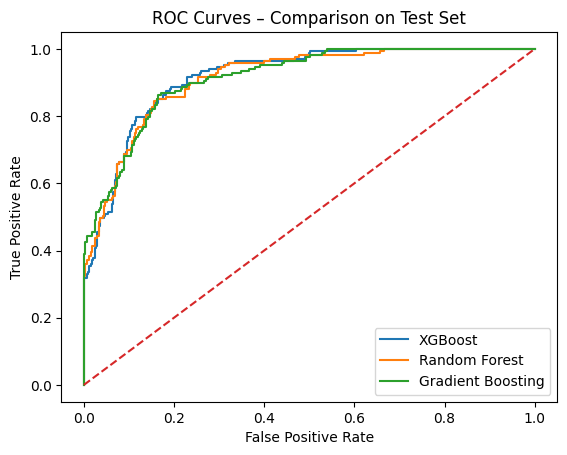

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
test_results = []

plt.figure()

for name, model in best_models.items():
    y_test_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    test_results.append({
        "Model": name,
        "AUC": roc_auc_score(y_test, y_test_proba)
    })
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Comparison on Test Set")
plt.legend()
plt.show()


In [ ]:
#on fixe le modele final
test_results_df = pd.DataFrame(test_results)
best_model_name = (
    test_results_df
    .sort_values(by="AUC", ascending=False)
    .iloc[0]["Model"]
)
best_model = best_models[best_model_name]
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

## Évaluation finale sur l’ensemble de test

Le modèle sélectionné est évalué sur l’ensemble de test,
qui n’a jamais été utilisé durant l’entraînement ni l’optimisation.

Les métriques rapportées sont :
- Accuracy
- Precision
- Recall
- F1-score
- AUC ROC

La matrice de confusion et la courbe ROC permettent
d’interpréter finement les performances du modèle.


In [ ]:
#prediction de classe
y_pred = best_model.predict(X_test)


In [ ]:
#prediction de probabilité
y_proba = best_model.predict_proba(X_test)[:, 1]


In [ ]:
#métrique final
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"AUC      : {auc:.3f}")


Accuracy : 0.849
Precision: 0.786
Recall   : 0.749
F1-score : 0.767
AUC      : 0.918


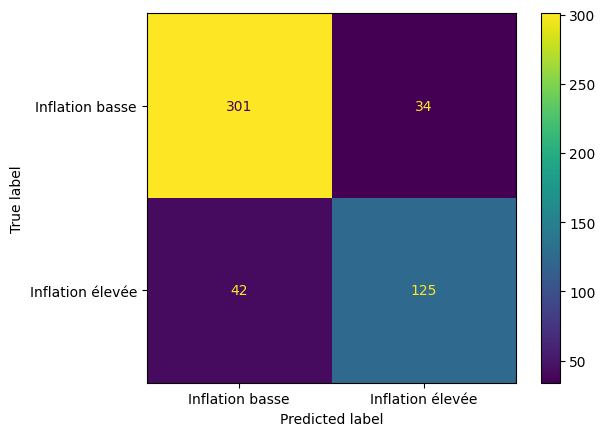

In [ ]:
#matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Inflation basse", "Inflation élevée"]
).plot()


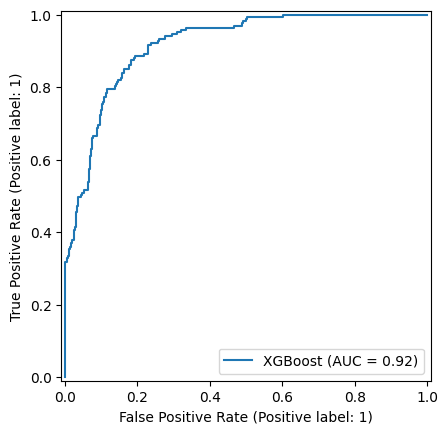

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_test,
    y_proba,
    name=best_model_name
)


In [ ]:
X_train.columns


Index(['inflation_cpi_pct', 'gdp_current_usd', 'gdp_per_capita_current_usd',
       'unemployment_rate_pct', 'interest_rate_real_pct',
       'inflation_gdp_deflator_pct', 'gdp_growth_pct_annual',
       'current_account_balance_pct_gdp', 'government_expense_pct_of_gdp',
       'government_revenue_pct_of_gdp', 'tax_revenue_pct_of_gdp',
       'gross_national_income_usd', 'public_debt_pct_of_gdp'],
      dtype='object')